# Loading, and finding contours

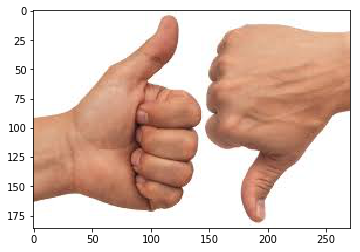

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Load in the image
image = cv2.imread('C:/Users/jeanjules.bigeard/OneDrive - Neato Robotics/Documents/thumbs.jpg')

# Change color to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

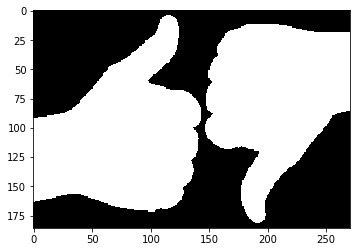

In [6]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray,210, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

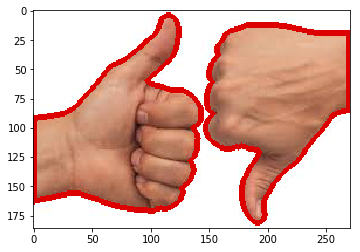

In [9]:
# Find contours from thresholded binary image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (220,0,0), 4)

plt.imshow(contours_image)

# Isolating with contour orientation

In [10]:
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    angles = []
    
    for cnt in contours:
        # Fit an ellipse to a contour and extract the angle from that ellipse
        (x,y), (MA,ma), angle = cv2.fitEllipse(cnt)
        angles.append(angle)
        
    return angles


# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [3.653592348098755, 28.87557029724121]


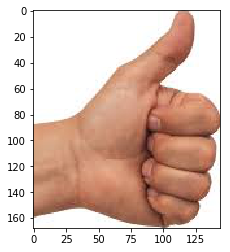

In [14]:
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    
    # Find the bounding rectangle of a selected contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    # Crop the image using the dimensions of the bounding rectangle
    cropped_image = cropped_image[y: y + h, x: x + w]
    
    return cropped_image

# Replace this value
selected_contour = contours[1]
cropped_image = left_hand_crop(image, selected_contour)
plt.imshow(cropped_image)